In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
DATA_DIR = r"C:\Users\raaga\OneDrive\Desktop\part3" 
IMG_SIZE = 100

def load_utkface_data():
    images = []
    labels = []

    for file in os.listdir(DATA_DIR):
        try:
            path = os.path.join(DATA_DIR, file)
            age = int(file.split("_")[0])  # Age is first part of filename
            img = cv2.imread(path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(age)
        except:
            continue  # skip if anything fails (bad file etc.)

    return np.array(images), np.array(labels)


In [9]:
X, y = load_utkface_data()

X = X / 255.0  # normalize pixels
y = np.array(y)

# Age regression → no one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 2601
Testing samples: 651


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)  # output: predicted age (regression)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()


C:\Users\raaga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353,217 (16.61 MB)

 Trainable params: 4,353,217 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 303ms/step - loss: 686.1495 - mae: 20.5020 - val_loss: 286.5204 - val_mae: 13.7283
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - loss: 317.2619 - mae: 13.8164 - val_loss: 277.7888 - val_mae: 12.8753
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - loss: 296.9847 - mae: 13.4192 - val_loss: 250.2319 - val_mae: 12.8660
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 278ms/step - loss: 266.8872 - mae: 12.7078 - val_loss: 229.7366 - val_mae: 11.8172
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - loss: 253.2619 - mae: 12.3950 - val_loss: 223.0296 - val_mae: 11.7715
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 283ms/step - loss: 210.4123 - mae: 11.2150 - val_loss: 217.0400 - val_mae: 11.4586
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 275ms/step - loss: 197.6276 - mae: 10.8128 - val_loss: 235.3929 - val_mae: 11.6883
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 281ms/step - loss: 195.5615 - mae: 10.7357 - val_loss: 219.2354 - val_mae: 11.6398


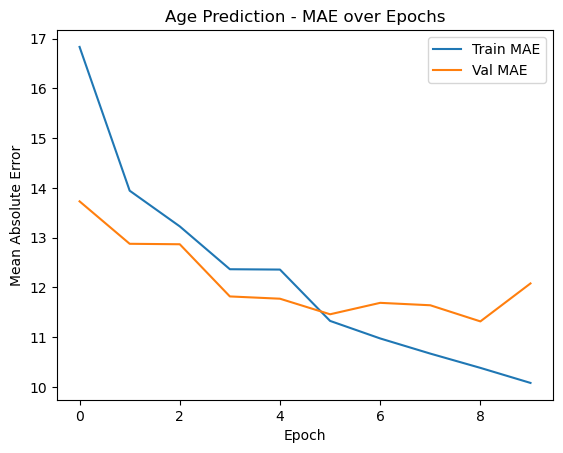

In [16]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.title("Age Prediction - MAE over Epochs")
plt.show()


In [18]:
# Predict on test data
y_pred = model.predict(X_test).flatten()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


Mean Absolute Error (MAE): 12.08
Root Mean Squared Error (RMSE): 15.23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


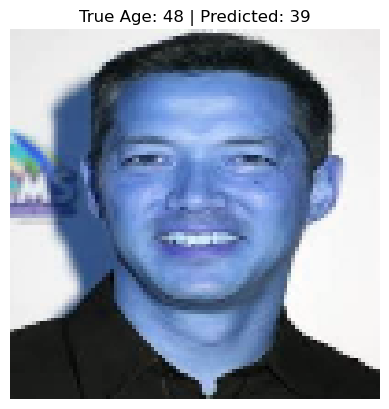

In [19]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Show a sample prediction
idx = np.random.randint(0, len(X_test))
sample_img = X_test[idx]
true_age = y_test[idx]
predicted_age = model.predict(np.expand_dims(sample_img, axis=0))[0][0]

plt.imshow(sample_img)
plt.title(f"True Age: {true_age} | Predicted: {int(predicted_age)}")
plt.axis('off')
plt.show()